In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname=font_path).get_name()
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
oil_USD = pd.read_csv("국제_원유가격20160101_20201231_달러.csv", encoding="cp949")
copper_USD = pd.read_csv("동 가격20160101_20201231_USD.csv")
base_rate = pd.read_csv("한국은행 기준금리 및 여수신금리20160101_20201231.csv", encoding="cp949")
exchange_rate_WON= pd.read_csv("환율20160101_20201231.csv", encoding="cp949")

In [3]:
oil= oil_USD.copy()
copper =copper_USD.copy()
baserate= base_rate.copy()
exchangerate= exchange_rate_WON.copy()

In [130]:
train = pd.read_csv("stk_hld_train.csv")

In [177]:
train.columns=["계좌 ID","종목코드","매수일자","보유기간(일)"]

# oil

In [7]:
oil['기간']= oil['기간'].apply(lambda x: '20' + str(x[0:2]) + '-' + str(x[3:5]) + '-'+ str(x[6:8]))

In [8]:
oil.rename(columns = {'기간' : 'Date'}, inplace = True)

In [9]:
oil = oil.drop(oil[oil['WTI']=='-'].index)

In [10]:
oil['WTI']= pd.to_numeric(oil['WTI'])

In [11]:
oil

,Date,WTI
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16
...,...,...
1285,2020-12-24,48.23
1286,2020-12-28,47.62
1287,2020-12-29,48.00
1288,2020-12-30,48.40


In [12]:
oil['Date'] = pd.to_datetime(oil['Date'], errors="ignore", format= "%Y-%m-%d")

In [10]:
oil['year_month']= pd.to_datetime(oil['Date'], format = '%Y%m')
oil['year_month'] = oil['Date'].astype('str')
oil['year_month'] = oil['year_month'].str[:7]

In [11]:
oil['year']= pd.to_datetime(oil['Date'], format = '%Y')
oil['year'] = oil['Date'].astype('str')
oil['year'] = oil['year'].str[:4]

In [80]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 0 to 1289
Data columns (total 2 columns):
Date    1260 non-null datetime64[ns]
WTI     1260 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.5 KB


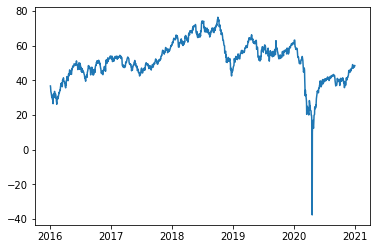

<Figure size 3600x2880 with 0 Axes>

In [454]:
plt.plot(oil['Date'], oil['WTI'])
plt.figure(figsize=(50,40))
plt.show()

In [474]:
oil[oil['year']=='2020']

,Date,WTI,1y,year_month,year
1031,2020-01-02,61.18,61.057500,2020-01,2020
1032,2020-01-03,63.05,61.294167,2020-01,2020
1033,2020-01-06,63.27,61.488333,2020-01,2020
1034,2020-01-07,62.70,61.635833,2020-01,2020
1035,2020-01-08,59.61,61.501667,2020-01,2020
...,...,...,...,...,...
1285,2020-12-24,48.23,47.489167,2020-12,2020
1286,2020-12-28,47.62,47.664167,2020-12,2020
1287,2020-12-29,48.00,47.765833,2020-12,2020
1288,2020-12-30,48.40,47.918333,2020-12,2020


2016


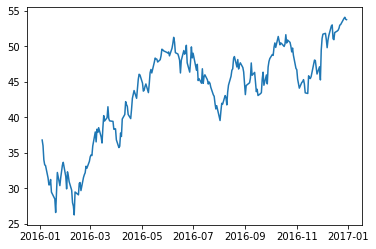

<Figure size 3600x2880 with 0 Axes>

2017


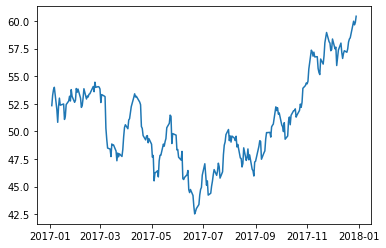

<Figure size 3600x2880 with 0 Axes>

2018


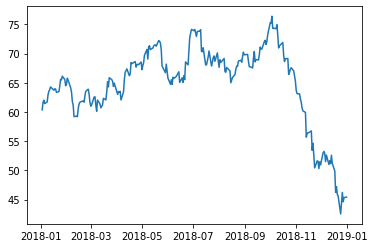

<Figure size 3600x2880 with 0 Axes>

2019


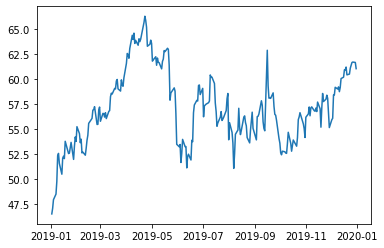

<Figure size 3600x2880 with 0 Axes>

2020


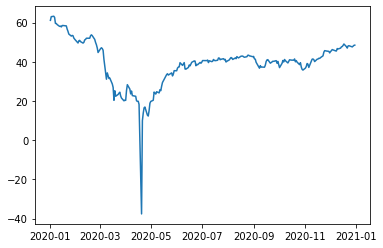

<Figure size 3600x2880 with 0 Axes>

In [478]:
for i in sorted(set(oil['year'])):
    print(i)
    plt.plot(oil[oil['year']==i ]['Date'], oil[oil['year']==i ]['WTI'])
    plt.figure(figsize=(50,40))
    plt.show()

In [347]:
oil['1y'] = oil['WTI'].rolling(window=12).mean()
oil

,Date,WTI,1y
0,2016-01-04,36.76,NaN
1,2016-01-05,35.97,NaN
2,2016-01-06,33.97,NaN
3,2016-01-07,33.27,NaN
4,2016-01-08,33.16,NaN
...,...,...,...
1285,2020-12-24,48.23,47.489167
1286,2020-12-28,47.62,47.664167
1287,2020-12-29,48.00,47.765833
1288,2020-12-30,48.40,47.918333


<AxesSubplot:xlabel='Date'>

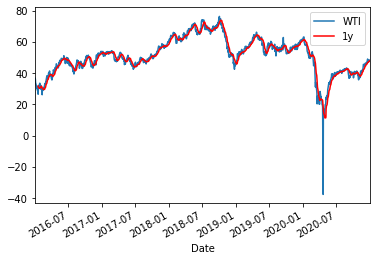

<Figure size 2160x2880 with 0 Axes>

In [351]:
# 12개월이동평균
oil['1y'] = oil['WTI'].rolling(window=12).mean()
ax = oil.plot(x='Date', y='WTI')
plt.figure(figsize=(30,40))
oil.plot(x='Date', y='1y', color='red', ax=ax)

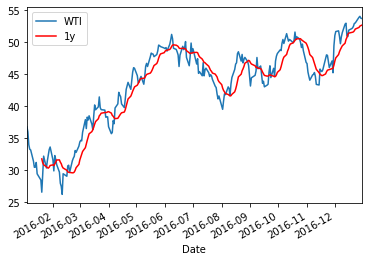

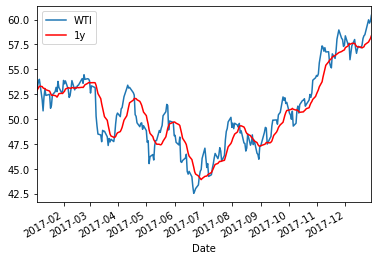

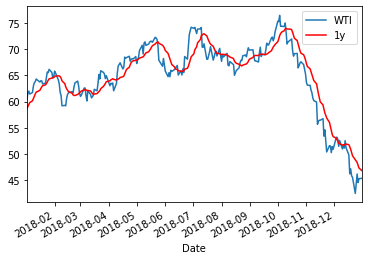

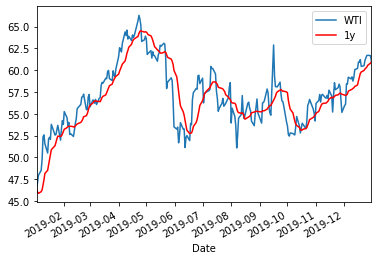

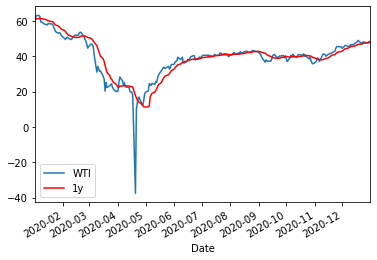

In [483]:
for i in sorted(set(oil['year'])):
    ax= oil[oil['year']==i].plot(x= 'Date',y='WTI')
    oil[oil['year']==i ].plot(x= 'Date', y='1y', color='red', ax=ax)

# copper

In [13]:
copper.rename(columns = {'기준일' : 'Date'}, inplace = True)

In [14]:
copper

,Date,기준가격,등락가,등락비율
0,2016.1.4,4640.0,-61.0,-1.30
1,2016.1.5,4647.5,7.5,0.16
2,2016.1.6,4601.0,-46.5,-1.00
3,2016.1.7,4508.0,-93.0,-2.02
4,2016.1.8,4489.0,-19.0,-0.42
...,...,...,...,...
1260,2020.12.23,7784.5,7.5,0.10
1261,2020.12.24,7811.5,27.0,0.35
1262,2020.12.29,7854.0,42.5,0.54
1263,2020.12.30,7815.5,-38.5,-0.49


In [15]:
copper['Date'] = pd.to_datetime(copper['Date'], errors="ignore", format= "%Y-%m-%d")

In [484]:
copper['year_month']= pd.to_datetime(copper['Date'], format = '%Y%m')
copper['year_month'] = copper['Date'].astype('str')
copper['year_month'] = copper['year_month'].str[:7]

In [485]:
copper['year']= pd.to_datetime(copper['Date'], format = '%Y')
copper['year'] = copper['Date'].astype('str')
copper['year'] = copper['year'].str[:4]

In [16]:
copper['기준가격']= pd.to_numeric(copper['기준가격'])
copper['등락가']= pd.to_numeric(copper['등락가'])
copper['등락비율']= pd.to_numeric(copper['등락비율'])

In [25]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 4 columns):
Date    1265 non-null datetime64[ns]
기준가격    1265 non-null float64
등락가     1265 non-null float64
등락비율    1265 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 39.7 KB


In [399]:
copper.isnull().sum()

Date    0
기준가격    0
등락가     0
등락비율    0
dtype: int64

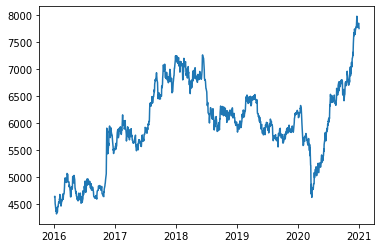

<Figure size 3600x5760 with 0 Axes>

In [453]:
plt.plot(copper['Date'], copper['기준가격'])
plt.figure(figsize=(50,80))
plt.show()

2016


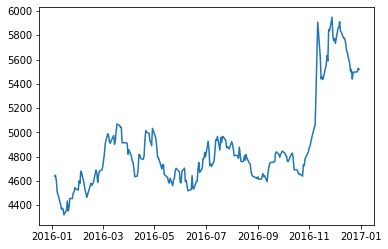

<Figure size 3600x2880 with 0 Axes>

2017


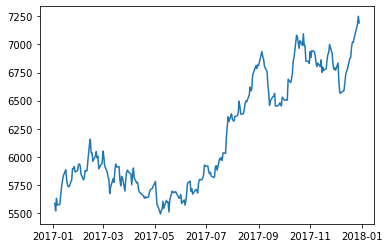

<Figure size 3600x2880 with 0 Axes>

2018


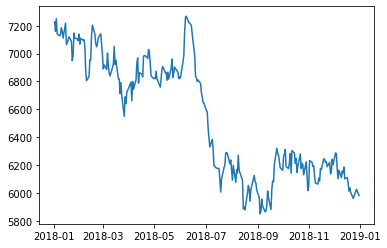

<Figure size 3600x2880 with 0 Axes>

2019


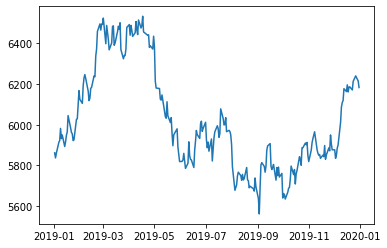

<Figure size 3600x2880 with 0 Axes>

2020


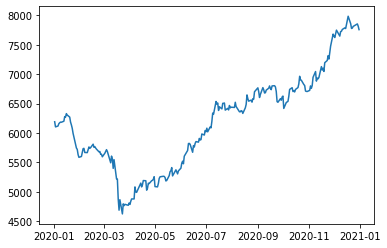

<Figure size 3600x2880 with 0 Axes>

In [486]:
for i in sorted(set(copper['year'])):
    print(i)
    plt.plot(copper[copper['year']==i ]['Date'], copper[copper['year']==i ]['기준가격'])
    plt.figure(figsize=(50,40))
    plt.show()

<AxesSubplot:xlabel='Date'>

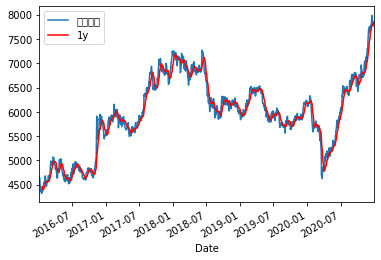

<Figure size 3600x4320 with 0 Axes>

In [464]:
# 12개월이동평균
copper['1y'] = copper['기준가격'].rolling(window=12).mean()
ax = copper.plot(x='Date', y='기준가격')
plt.figure(figsize=(50,60))
copper.plot(x='Date', y='1y', color='red', ax=ax)

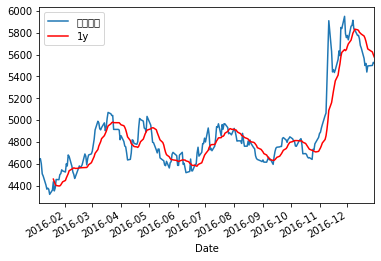

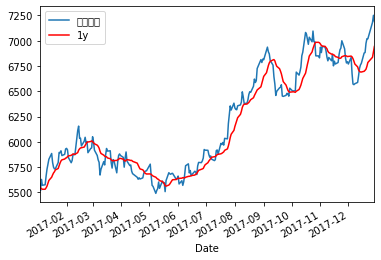

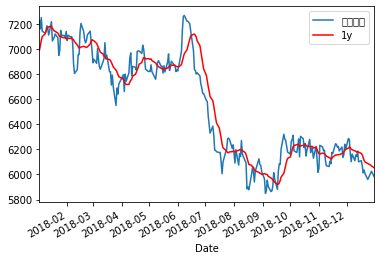

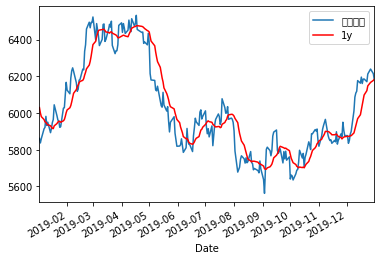

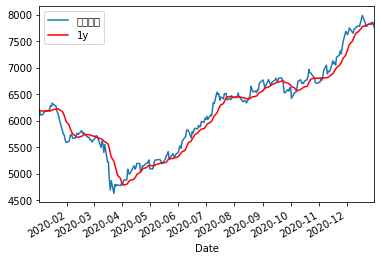

In [487]:
for i in sorted(set(oil['year'])):
    ax= copper[copper['year']==i ].plot(x= 'Date',y='기준가격')
    copper[copper['year']==i ].plot(x= 'Date', y='1y', color='red', ax=ax)

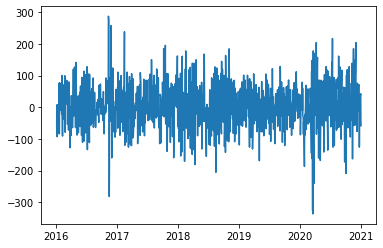

<Figure size 3600x5760 with 0 Axes>

In [400]:
plt.plot(copper['Date'], copper['등락가'])
plt.figure(figsize=(50,80))
plt.show()

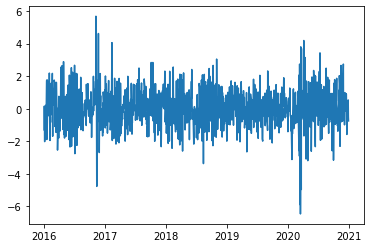

<Figure size 3600x5760 with 0 Axes>

In [401]:
plt.plot(copper['Date'], copper['등락비율'])
plt.figure(figsize=(50,80))
plt.show()

# base rate

In [17]:
def date(x):
    y = x.split('.')
    return y[0]+'-'+ '%02d' %int(y[1]) + '-'+ '%02d' %int(y[2])

In [18]:
baserate['단위']= pd.DataFrame(baserate['단위'].apply(lambda x : date(x)))

In [19]:
baserate.rename(columns = {'단위' : 'Date'}, inplace = True)

In [20]:
baserate['Date'] = pd.to_datetime(baserate['Date'], errors="ignore", format= "%Y-%m-%d")

In [488]:
baserate['year_month']= pd.to_datetime(baserate['Date'], format = '%Y%m')
baserate['year_month'] = baserate['Date'].astype('str')
baserate['year_month'] = baserate['year_month'].str[:7]

In [489]:
baserate['year']= pd.to_datetime(baserate['Date'], format = '%Y')
baserate['year'] = baserate['Date'].astype('str')
baserate['year'] = baserate['year'].str[:4]

In [21]:
baserate['연%']= pd.to_numeric(baserate['연%'])

In [22]:
baserate

,Date,연%
0,2016-01-04,1.5
1,2016-01-05,1.5
2,2016-01-06,1.5
3,2016-01-07,1.5
4,2016-01-08,1.5
...,...,...
1227,2020-12-24,0.5
1228,2020-12-28,0.5
1229,2020-12-29,0.5
1230,2020-12-30,0.5


In [359]:
baserate.isnull().sum()

Date    0
연%      0
dtype: int64

In [361]:
baserate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 2 columns):
Date    1232 non-null datetime64[ns]
연%      1232 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.4 KB


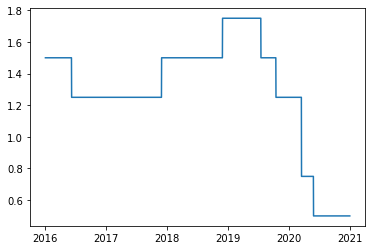

<Figure size 3600x5760 with 0 Axes>

In [360]:
plt.plot(baserate['Date'], baserate['연%'])
plt.figure(figsize=(50,80))
plt.show()

2016


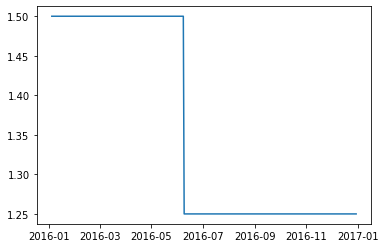

<Figure size 3600x2880 with 0 Axes>

2017


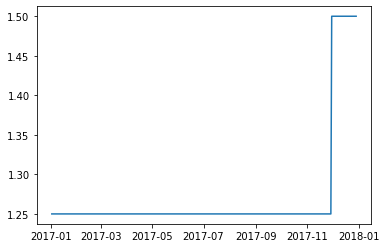

<Figure size 3600x2880 with 0 Axes>

2018


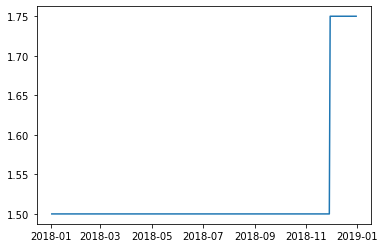

<Figure size 3600x2880 with 0 Axes>

2019


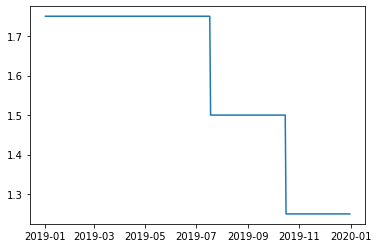

<Figure size 3600x2880 with 0 Axes>

2020


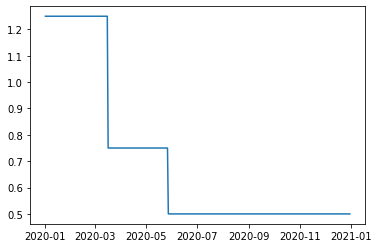

<Figure size 3600x2880 with 0 Axes>

In [490]:
for i in sorted(set(baserate['year'])):
    print(i)
    plt.plot(baserate[baserate['year']==i ]['Date'], baserate[baserate['year']==i ]['연%'])
    plt.figure(figsize=(50,40))
    plt.show()

# exchange rate

In [23]:
def date(x):
    y = x.split('.')
    return y[0]+'-'+ '%02d' %int(y[1]) + '-'+ '%02d' %int(y[2])

In [24]:
exchangerate['단위']= pd.DataFrame(exchangerate['단위'].apply(lambda x : date(x)))

In [25]:
exchangerate.rename(columns = {'단위' : 'Date'}, inplace = True)

In [26]:
exchangerate['Date'] = pd.to_datetime(exchangerate['Date'], errors="ignore", format= "%Y-%m-%d")

In [491]:
exchangerate['year_month']= pd.to_datetime(exchangerate['Date'], format = '%Y%m')
exchangerate['year_month'] = exchangerate['Date'].astype('str')
exchangerate['year_month'] = exchangerate['year_month'].str[:7]

In [492]:
exchangerate['year']= pd.to_datetime(exchangerate['Date'], format = '%Y')
exchangerate['year'] = exchangerate['Date'].astype('str')
exchangerate['year'] = exchangerate['year'].str[:4]

In [27]:
exchangerate['원']= pd.to_numeric(exchangerate['원'])

In [28]:
exchangerate

,Date,원
0,2016-01-04,1172.0
1,2016-01-05,1184.3
2,2016-01-06,1187.7
3,2016-01-07,1193.9
4,2016-01-08,1199.7
...,...,...
1227,2020-12-24,1108.9
1228,2020-12-28,1103.7
1229,2020-12-29,1098.2
1230,2020-12-30,1093.2


In [388]:
exchangerate.isnull().sum()

Date    0
원       0
dtype: int64

In [389]:
exchangerate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 2 columns):
Date    1232 non-null datetime64[ns]
원       1232 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.4 KB


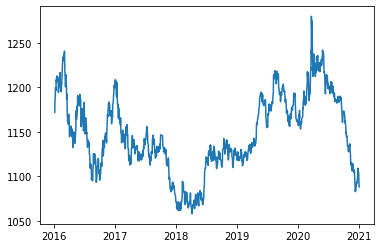

<Figure size 3600x5760 with 0 Axes>

In [390]:
plt.plot(exchangerate['Date'],exchangerate['원'])
plt.figure(figsize=(50,80))
plt.show()

2016


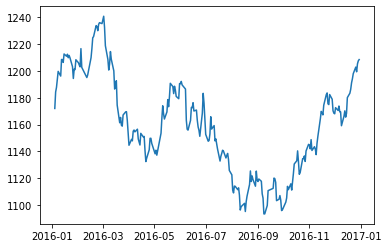

<Figure size 3600x2880 with 0 Axes>

2017


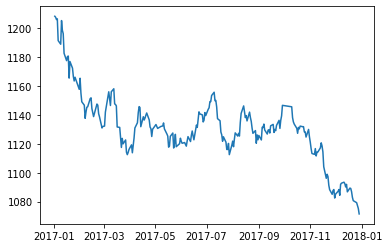

<Figure size 3600x2880 with 0 Axes>

2018


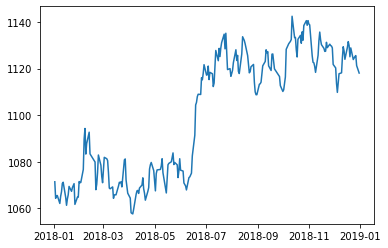

<Figure size 3600x2880 with 0 Axes>

2019


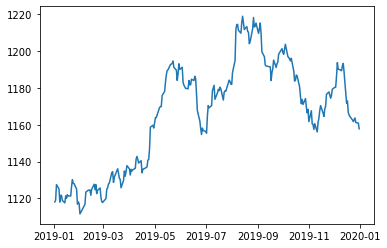

<Figure size 3600x2880 with 0 Axes>

2020


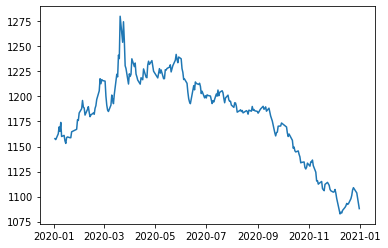

<Figure size 3600x2880 with 0 Axes>

In [493]:
for i in sorted(set(exchangerate['year'])):
    print(i)
    plt.plot(exchangerate[exchangerate['year']==i ]['Date'], exchangerate[exchangerate['year']==i ]['원'])
    plt.figure(figsize=(50,40))
    plt.show()

<AxesSubplot:xlabel='Date'>

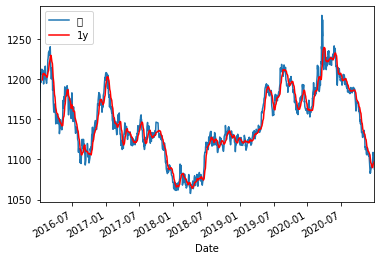

In [465]:
# 12개월이동평균
exchangerate['1y'] = exchangerate['원'].rolling(window=12).mean()
ax = exchangerate.plot(x='Date', y='원')
exchangerate.plot(x='Date', y='1y', color='red', ax=ax)

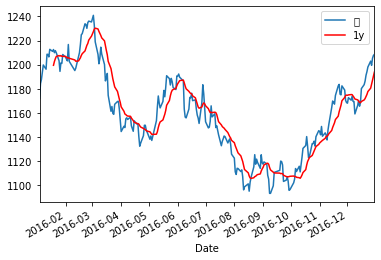

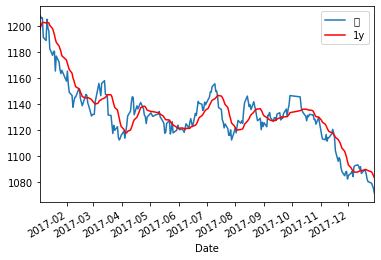

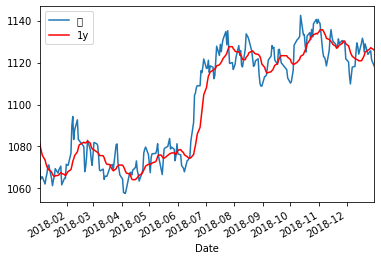

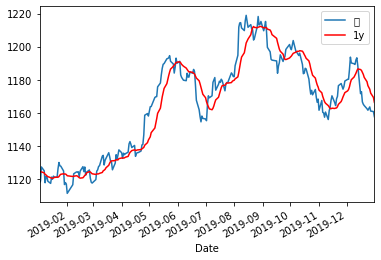

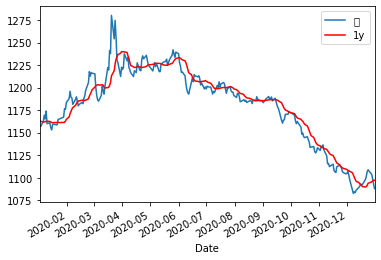

In [496]:
for i in sorted(set(exchangerate['year'])):
    ax= exchangerate[exchangerate['year']==i ].plot(x= 'Date',y='원')
    exchangerate[exchangerate['year']==i ].plot(x= 'Date', y='1y', color='red' , ax=ax)

-------

# 일자 수 비교

## oil vs base rate&exchange rate 일자 비교

In [316]:
check1 = pd.merge(oil, baserate, on='Date', how='outer')
a = check1[check1['연%'].isnull()]
a

,Date,WTI,연%
24,2016-02-08,29.69,NaN
25,2016-02-09,27.94,NaN
26,2016-02-10,27.45,NaN
39,2016-03-01,34.40,NaN
69,2016-04-13,41.76,NaN
...,...,...,...
1164,2020-08-17,42.89,NaN
1195,2020-09-30,40.22,NaN
1196,2020-10-01,38.72,NaN
1197,2020-10-02,37.05,NaN


## oil vs copper 일자 비교

In [317]:
check2= pd.merge(oil, copper, on='Date', how='outer')
b = check2[check2['기준가격'].isnull()]
b

,Date,WTI,기준가격,등락가,등락비율
57,2016-03-28,39.39,NaN,NaN,NaN
82,2016-05-02,44.78,NaN,NaN,NaN
165,2016-08-29,46.98,NaN,NaN,NaN
248,2016-12-27,53.90,NaN,NaN,NaN
323,2017-04-17,52.65,NaN,NaN,NaN
333,2017-05-01,48.84,NaN,NaN,NaN
416,2017-08-28,46.57,NaN,NaN,NaN
499,2017-12-26,59.97,NaN,NaN,NaN
564,2018-04-02,63.01,NaN,NaN,NaN
589,2018-05-07,70.73,NaN,NaN,NaN


In [318]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 57 to 1256
Data columns (total 5 columns):
Date    20 non-null datetime64[ns]
WTI     20 non-null object
기준가격    0 non-null object
등락가     0 non-null float64
등락비율    0 non-null float64
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 960.0+ bytes


## base rate vs exchange rate 일자 비교

In [319]:
check3= pd.merge(baserate,exchangerate, on='Date', how='outer')
c = check3[check3['연%'].isnull()]
c

,Date,연%,원


## copper vs base rate&exchange rate 일자 비교

In [320]:
check4= pd.merge(copper,exchangerate, on='Date', how='outer')
d = check4[check4['등락가'].isnull()]
d

,Date,기준가격,등락가,등락비율,원
1265,2016-03-25,NaN,NaN,NaN,"1,167.10"
1266,2016-03-28,NaN,NaN,NaN,"1,169.40"
1267,2016-05-02,NaN,NaN,NaN,"1,138.10"
1268,2016-05-30,NaN,NaN,NaN,"1,179.30"
1269,2016-08-29,NaN,NaN,NaN,"1,113.90"
1270,2016-12-26,NaN,NaN,NaN,"1,202.90"
1271,2016-12-27,NaN,NaN,NaN,"1,199.40"
1272,2017-01-02,NaN,NaN,NaN,"1,208.50"
1273,2017-04-14,NaN,NaN,NaN,"1,131.90"
1274,2017-04-17,NaN,NaN,NaN,"1,138.80"


In [321]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1265 to 1293
Data columns (total 5 columns):
Date    29 non-null datetime64[ns]
기준가격    0 non-null object
등락가     0 non-null float64
등락비율    0 non-null float64
원       29 non-null object
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.4+ KB


In [208]:
check5= pd.merge(copper,baserate, on='Date', how='outer')
e = check5[check5['연%'].isnull()]
e

,Date,기준가격,등락가,등락비율,연%
25,2016-02-08,4577.0,-91.0,-1.95,NaN
26,2016-02-09,4526.0,-51.0,-1.11,NaN
27,2016-02-10,4504.0,-22.0,-0.49,NaN
41,2016-03-01,4716.5,25.5,0.54,NaN
70,2016-04-13,4820.0,120.0,2.55,NaN
...,...,...,...,...,...
1169,2020-08-17,6428.0,94.0,1.48,NaN
1200,2020-09-30,6612.0,54.0,0.82,NaN
1201,2020-10-01,6628.0,16.0,0.24,NaN
1202,2020-10-02,6418.5,-209.5,-3.16,NaN


---------

# 문제 해결!

In [322]:
# 국내주식 잔고이력(STK_BNC_HIST.CSV) _ 잔고정보 (국내 주식건에 한해) <- 여기세 종목 정보 들어있음
stk_bnc_hist = pd.read_csv('stk_bnc_hist.csv')

# 국내주식 보유기간(STK_HLD_.CSV)
stk_hld_test = pd.read_csv('stk_hld_test.csv')
stk_hld_train = pd.read_csv('stk_hld_train.csv')

In [323]:
hist= stk_bnc_hist.copy()
train = stk_hld_train.copy()
test= stk_hld_test.copy()

In [29]:
# 국내주식 잔고이력(STK_BNC_HIST.CSV) _ 잔고정보 (국내 주식건에 한해) <- 여기세 종목 정보 들어있음
stk_bnc_hist = pd.read_csv('stk_bnc_hist.csv')
hist= stk_bnc_hist.copy()
hist.columns= ["계좌 ID","기준일자","종목코드","잔고수량","잔고금액","주당 액면가"]

In [324]:
# 국내주식 잔고이력
hist.columns= ["계좌 ID","기준일자","종목코드","잔고수량","잔고금액","주당 액면가"]
train.columns=["계좌 ID","종목코드","매수일자","보유기간(일)"]
test.columns=["계좌 ID","종목코드","매수 일자","과거 보유일","제출ID","보유기간(일)"]

In [446]:
hist

,계좌 ID,기준일자,종목코드,잔고수량,잔고금액,주당 액면가,Date
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2020-08-20,A008770,40.0,2828000.0,5000.0,2020-08-20
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2020-06-23,A008770,20.0,1390000.0,5000.0,2020-06-23
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2016-01-04,A005940,311.0,2982490.0,5000.0,2016-01-04
3,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2020-08-14,A005930,40.0,2320000.0,100.0,2020-08-14
4,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2020-06-23,A005930,20.0,1028000.0,100.0,2020-06-23
...,...,...,...,...,...,...,...
2573834,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2020-08-06,A035720,1.0,364000.0,500.0,2020-08-06
2573835,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2020-08-13,A035720,0.0,0.0,500.0,2020-08-13
2573836,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2020-08-19,A035720,1.0,376500.0,500.0,2020-08-19
2573837,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2020-08-25,A035720,0.0,0.0,500.0,2020-08-25


In [30]:
hist['기준일자'] = hist['기준일자'].astype('str')
hist['기준일자'] = pd.to_datetime(hist['기준일자'])

In [31]:
hist['기준일자'].nunique()

1227

In [32]:
hist_unique = pd.DataFrame(hist['기준일자'].unique(), columns=['Date']).sort_values(by='Date' , ascending=True).reset_index()
hist_unique

,index,Date
0,2,2016-01-04
1,661,2016-01-05
2,701,2016-01-06
3,28,2016-01-07
4,500,2016-01-08
...,...,...
1222,63,2020-12-23
1223,62,2020-12-24
1224,61,2020-12-28
1225,10,2020-12-29


In [195]:
base_unique = pd.DataFrame(baserate['Date'].unique(),columns=['Date'])
base_unique 

,Date
0,2016-01-04
1,2016-01-05
2,2016-01-06
3,2016-01-07
4,2016-01-08
...,...
1227,2020-12-24
1228,2020-12-28
1229,2020-12-29
1230,2020-12-30


In [33]:
hist['Date']= hist['기준일자']

In [452]:
aa = pd.merge(hist_unique,base_unique, on='Date', how='outer')
aa_na = aa[aa['index'].isnull()]
aa_na

,index,Date
1227,NaN,2016-12-30
1228,NaN,2017-12-29
1229,NaN,2018-12-31
1230,NaN,2019-12-31
1231,NaN,2020-12-31


In [502]:
hist_unique['Date']

0      2016-01-04
1      2016-01-05
2      2016-01-06
3      2016-01-07
4      2016-01-08
          ...    
1222   2020-12-23
1223   2020-12-24
1224   2020-12-28
1225   2020-12-29
1226   2020-12-30
Name: Date, Length: 1227, dtype: datetime64[ns]

In [34]:
temp1= pd.merge(hist_unique['Date'] , oil[['Date','WTI']], how='left')
df1 = temp1.dropna()

In [35]:
temp2= pd.merge(hist_unique['Date'] , copper[['Date','기준가격']] , how='left')
temp2[temp2['기준가격'].isnull()]
temp2['기준가격'].isnull().sum()
df2 = temp2.dropna()

In [36]:
temp3= pd.merge(hist_unique['Date'], baserate[['Date','연%']] , how='inner')
temp3[temp3['연%'].isnull()]
df3 = temp3.dropna()

# 지수평활

In [156]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [38]:
oil

,Date,WTI
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16
...,...,...
1285,2020-12-24,48.23
1286,2020-12-28,47.62
1287,2020-12-29,48.00
1288,2020-12-30,48.40


In [189]:
# Simple Exponential Smoothing
model1 = SimpleExpSmoothing(oil['WTI'].loc[0:5]).fit(smoothing_level=0.5, optimized=False) # 단순지수평활 모델 생성

In [190]:
fcast1 = model1.forecast(1)

In [191]:
fcast1

6    32.549687
dtype: float64

In [ ]:
# Simple Exponential Smoothing
model = SimpleExpSmoothing(train['Temp']).fit(smoothing_level=0.5) # 단순지수평활 모델 생성
test['SES'] = model2.forecast(365) # 365일의 데이터 forecast

In [ ]:
fit1 = SimpleExpSmoothing(saledata).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')

In [134]:
train['매수일자']

0         20180726
1         20180131
2         20180517
3         20201112
4         20180905
            ...   
681467    20180831
681468    20201027
681469    20181121
681470    20200214
681471    20200116
Name: 매수일자, Length: 681472, dtype: object

In [133]:
train['매수일자'] = train['매수일자'].astype('str')

In [40]:
train['매수일자'] = pd.to_datetime(train['매수일자'])

In [35]:
import warnings

warnings.filterwarnings(action='ignore') 

In [71]:
if df1[df1['Date']== '2016-01-18']['Date'].isnull().sum()!=0:
    print('a')
else: 
    print('b')

b


In [94]:
train_oil= pd.DataFrame(index=range(0,len(set(train['매수일자']))),columns =['Date']+['oil'])

In [95]:
temp_list = [np.nan]

In [192]:
import re
string = str(df1[df1['Date']== '2016-01-04'].index)
numbers = re.findall(r'\d+', string)
temp = oil.iloc[0:int(numbers[1])]

In [193]:
string

"Int64Index([0], dtype='int64')"

In [194]:
temp = oil.iloc[0]
temp

Date    2015-12-21 00:00:00
WTI                   36.76
Name: 0, dtype: object

In [195]:
import re
string = str(df1[df1['Date']== '2016-01-04'].index)
numbers = re.findall(r'\d+', string)
temp = oil.iloc[0:int(numbers[1])]
model = SimpleExpSmoothing(temp['WTI']).fit(smoothing_level=0.5, optimized=False) # 단순지수평활 모델 생성
fcast1 = model.forecast(1)

ValueError: negative dimensions are not allowed

In [99]:
float(str(round(fcast1,2)).split()[1])

57.0

In [196]:
temp_list.append(float(str(round(fcast1,2)).split()[1]))

In [197]:
temp_list

[nan, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 32.55]

In [198]:
train_oil.iloc[0,] = temp_list

ValueError: cannot copy sequence with size 9 to array axis with dimension 2

In [103]:
train_oil

,Date,oil
0,NaN,57
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1221,NaN,NaN
1222,NaN,NaN
1223,NaN,NaN
1224,NaN,NaN


---------

In [42]:
train_unique = pd.DataFrame(train['매수일자'].unique(),columns=['Date'])
train_unique = train_unique.sort_values(by='Date')
train_unique

,Date
21,2016-01-04
905,2016-01-05
264,2016-01-06
863,2016-01-07
1096,2016-01-08
...,...
402,2020-12-22
1072,2020-12-23
520,2020-12-24
256,2020-12-28


In [49]:
oil_date = pd.merge(train_unique, oil, how='left')
df1 = oil_date.dropna()

In [50]:
df1 = df1.sort_values(by='Date').reset_index().drop(['index'], axis=1, inplace=False)

In [51]:
df1

,Date,WTI
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16
...,...,...
1184,2020-12-22,47.02
1185,2020-12-23,48.12
1186,2020-12-24,48.23
1187,2020-12-28,47.62


In [162]:
set(df1['Date'])

{Timestamp('2020-07-02 00:00:00'),
 Timestamp('2020-08-18 00:00:00'),
 Timestamp('2018-05-03 00:00:00'),
 Timestamp('2016-11-10 00:00:00'),
 Timestamp('2017-03-23 00:00:00'),
 Timestamp('2019-05-10 00:00:00'),
 Timestamp('2017-08-01 00:00:00'),
 Timestamp('2018-03-05 00:00:00'),
 Timestamp('2017-10-13 00:00:00'),
 Timestamp('2018-01-03 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2018-06-11 00:00:00'),
 Timestamp('2019-01-18 00:00:00'),
 Timestamp('2019-09-05 00:00:00'),
 Timestamp('2017-03-14 00:00:00'),
 Timestamp('2016-11-08 00:00:00'),
 Timestamp('2017-06-27 00:00:00'),
 Timestamp('2019-05-02 00:00:00'),
 Timestamp('2020-11-09 00:00:00'),
 Timestamp('2019-06-18 00:00:00'),
 Timestamp('2017-07-13 00:00:00'),
 Timestamp('2019-12-18 00:00:00'),
 Timestamp('2020-09-03 00:00:00'),
 Timestamp('2018-07-24 00:00:00'),
 Timestamp('2017-03-08 00:00:00'),
 Timestamp('2018-12-10 00:00:00'),
 Timestamp('2018-12-28 00:00:00'),
 Timestamp('2020-03-03 00:00:00'),
 Timestamp('2019-07-

In [180]:
import re

train_oil= pd.DataFrame(index=range(0,len(set(df1['Date']))) ,columns =['Date']+['oil'])
n = 0

for i in tqdm(set(df1['Date'])-set('2016-01-04 00:00:00')):
    temp_list = [np.nan]
    
    string = str(df1[df1['Date']== i].index)
    numbers = re.findall(r'\d+', string)
    temp = df1.iloc[0:int(numbers[1])]
    
    model = SimpleExpSmoothing(temp['WTI']).fit(smoothing_level=0.5, optimized=True ) # 단순지수평활 모델 생성
    fcast1 = model.forecast(1)
    temp_list.append(str(round(fcast1,2)).split()[1])
    
    train_oil.iloc[n,:]=temp_list
    n+=1
    
train_oil['Date'] = set(df1['Date'])

 16%|█▌        | 185/1189 [00:01<00:07, 135.77it/s]


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [41]:
train_oil

,Date,oil
0,NaN,31.18
1,NaN,40.36
2,NaN,65.57
3,NaN,48.04
4,NaN,36.28
...,...,...
1221,NaN,NaN
1222,NaN,NaN
1223,NaN,NaN
1224,NaN,NaN


In [62]:
import re
train_oil= pd.DataFrame(index=range(0,len(set(train['매수일자']))),columns =['Date']+['oil'])
n = 0

for i in tqdm(set(train['매수일자'])):
    temp_list = [np.nan]
    
    if df1[df1['Date']==i]['Date'].isnull().sum()==0 :
        temp_list.append([np.nan])    
    else :
        string = str(df1[df1['Date']== i].index)
        numbers = re.findall(r'\d+', string)
        temp = oil.iloc[0:int(numbers[1])]
        model = SimpleExpSmoothing(temp['WTI']).fit(smoothing_level=0.5, optimized=False) # 단순지수평활 모델 생성
        fcast1 = model.forecast(1)
        temp_list.append(str(round(fcast1,2)).split()[1])
        
    train_oil.iloc[n,:] = temp_list
    n+=1
    
train_oil['Date'] = set(train['매수일자'])

100%|██████████| 1226/1226 [00:01<00:00, 750.43it/s]


In [63]:
train_oil

,Date,oil
0,2019-01-25,"[nan, nan]"
1,2019-10-08,"[nan, nan]"
2,2018-04-13,"[nan, nan]"
3,2018-11-07,"[nan, nan]"
4,2020-09-07,"[nan, nan]"
...,...,...
1221,2016-04-04,"[nan, nan]"
1222,2018-11-14,"[nan, nan]"
1223,2020-03-05,"[nan, nan]"
1224,2019-05-23,"[nan, nan]"


----

In [179]:
oil['Date']

0      2016-01-04
1      2016-01-05
2      2016-01-06
3      2016-01-07
4      2016-01-08
          ...    
1285   2020-12-24
1286   2020-12-28
1287   2020-12-29
1288   2020-12-30
1289   2020-12-31
Name: Date, Length: 1260, dtype: datetime64[ns]

In [177]:
import datetime
dates = '2020-08-18 00:00:00','2018-05-03 00:00:00'
target = '2020-07-02 00:00:00'
res = max(date for date in dates if date < target)
print(res)

TypeError: '<' not supported between instances of 'Timestamp' and 'str'

In [175]:
import datetime
import re
train_oil= pd.DataFrame(index=range(0,len(set(train_unique['Date']))) ,columns =['Date']+['oil'])
n=0

for i in tqdm(set(train_unique['Date'])):
    dates = list(oil['Date'])
    target = i
    temp_list = [np.nan]
    res = max(date for date in dates if date <= target)
    string = str(oil[oil['Date']== res].index)
    numbers = re.findall(r'\d+', string)
    temp = oil.iloc[0:int(numbers[1])]
    
    model = SimpleExpSmoothing(temp['WTI']).fit(smoothing_level=0.5, optimized=True ) # 단순지수평활 모델 생성
    fcast1 = model.forecast(1)
    temp_list.append(str(round(fcast1,2)).split()[1])
    
    train_oil.iloc[n,:]=temp_list
    n+=1
    
train_oil['Date'] = set(train_unique['Date'])

 32%|███▏      | 398/1226 [00:04<00:09, 89.53it/s]


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [176]:
dates = list(oil['Date'])
target = '2017-08-11 00:00:00'
res = max(date for date in dates if date <= target)
string = str(oil[oil['Date']== res].index)
numbers = re.findall(r'\d+', string)
temp = oil.iloc[0:int(numbers[1])]

TypeError: '<=' not supported between instances of 'Timestamp' and 'str'

# 다시

In [199]:
oil_2015= pd.read_csv('원유가격20151221_20201231_달러.csv', encoding='cp949')

In [200]:
oil_2015

,기간,WTI
0,15년12월21일,34.74
1,15년12월22일,36.14
2,15년12월23일,37.5
3,15년12월24일,38.1
4,15년12월28일,36.81
...,...,...
1293,20년12월24일,48.23
1294,20년12월28일,47.62
1295,20년12월29일,48
1296,20년12월30일,48.4


In [201]:
oil_2015['기간']= oil_2015['기간'].apply(lambda x: '20' + str(x[0:2]) + '-' + str(x[3:5]) + '-'+ str(x[6:8]))

In [206]:
train['매수일자'] = train['매수일자'].apply(lambda x: str(x[0:4]) + '-' + str(x[4:6]) + '-'+ str(x[6:8]))

In [202]:
oil_2015.rename(columns = {'기간' : 'Date'}, inplace = True)

In [203]:
oil_2015 = oil_2015.drop(oil_2015[oil_2015['WTI']=='-'].index)

In [204]:
oil_2015['WTI']= pd.to_numeric(oil_2015['WTI'])

In [205]:
oil_2015

,Date,WTI
0,2015-12-21,34.74
1,2015-12-22,36.14
2,2015-12-23,37.50
3,2015-12-24,38.10
4,2015-12-28,36.81
...,...,...
1293,2020-12-24,48.23
1294,2020-12-28,47.62
1295,2020-12-29,48.00
1296,2020-12-30,48.40


In [96]:
# oil_2015['Date'] = pd.to_datetime(oil_2015['Date'], errors="ignore", format= "%Y-%m-%d")

In [207]:
train_unique = pd.DataFrame(train['매수일자'].unique(),columns=['Date'])
train_unique = train_unique.sort_values(by='Date').reset_index()
train_unique

,index,Date
0,10,2016--0-1-
1,48,2016--0-2-
2,8,2016--0-3-
3,54,2016--0-4-
4,18,2016--0-5-
5,27,2016--0-6-
6,44,2016--0-7-
7,47,2016--0-8-
8,29,2016--0-9-
9,28,2016--1-0-


In [142]:
df = pd.merge(train_unique['Date'], oil_2015 , on='Date', how='outer')
df

,Date,WTI
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16
...,...,...
1300,2020-10-01,38.72
1301,2020-10-02,37.05
1302,2020-10-09,40.60
1303,2020-12-30,48.40


In [143]:
common = pd.merge(train_unique['Date'], oil_2015, how='left')
common = common.dropna()
common

,Date,WTI
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16
...,...,...
1221,2020-12-22,47.02
1222,2020-12-23,48.12
1223,2020-12-24,48.23
1224,2020-12-28,47.62


In [144]:
import warnings
warnings.filterwarnings(action='ignore') 

In [145]:
import re

train_oil= pd.DataFrame(index=range(0,len(set(common['Date']))) ,columns =['Date']+['oil'])
n = 0

for i in tqdm(sorted(set(common['Date']))):
    temp_list = [np.nan]
    
    string = str(df[df['Date']== i].index)
    numbers = re.findall(r'\d+', string)
    temp = df.iloc[0:int(numbers[1])]
    
    model = SimpleExpSmoothing(temp['WTI']).fit(smoothing_level=0.5, optimized=True ) # 단순지수평활 모델 생성
    fcast1 = model.forecast(1)
    temp_list.append(str(round(fcast1,2)).split()[1])
    
    train_oil.iloc[n,:]=temp_list
    n+=1
    
train_oil['Date'] = sorted(set(common['Date']))

 42%|████▏     | 501/1189 [00:05<00:07, 88.31it/s]


ValueError: negative dimensions are not allowed

In [168]:
string = str(df[df['Date']== '2020-09-22'].index)
numbers = re.findall(r'\d+', string)
temp = df.iloc[0:int(numbers[1])]

In [184]:
temp['Date'] = pd.to_datetime(temp['Date'], errors="ignore", format= "%Y-%m-%d")

In [187]:
model = SimpleExpSmoothing(temp['WTI']).fit(smoothing_level=0.5, optimized=False ) # 단순지수평활 모델 생성
fcast1 = model.forecast(1)
temp_list.append(str(round(fcast1,2)).split()[1])

In [188]:
fcast1

1160   NaN
dtype: float64

In [172]:
str(round(fcast1,2)).split()[1]

'NaN'

In [117]:
train_oil['Date'] = set(common['Date'])

In [148]:
sorted(set(common['Date']))

['2016-01-04',
 '2016-01-05',
 '2016-01-06',
 '2016-01-07',
 '2016-01-08',
 '2016-01-11',
 '2016-01-12',
 '2016-01-13',
 '2016-01-14',
 '2016-01-15',
 '2016-01-19',
 '2016-01-20',
 '2016-01-21',
 '2016-01-22',
 '2016-01-25',
 '2016-01-26',
 '2016-01-27',
 '2016-01-28',
 '2016-01-29',
 '2016-02-01',
 '2016-02-02',
 '2016-02-03',
 '2016-02-04',
 '2016-02-05',
 '2016-02-11',
 '2016-02-12',
 '2016-02-16',
 '2016-02-17',
 '2016-02-18',
 '2016-02-19',
 '2016-02-22',
 '2016-02-23',
 '2016-02-24',
 '2016-02-25',
 '2016-02-26',
 '2016-02-29',
 '2016-03-02',
 '2016-03-03',
 '2016-03-04',
 '2016-03-07',
 '2016-03-08',
 '2016-03-09',
 '2016-03-10',
 '2016-03-11',
 '2016-03-14',
 '2016-03-15',
 '2016-03-16',
 '2016-03-17',
 '2016-03-18',
 '2016-03-21',
 '2016-03-22',
 '2016-03-23',
 '2016-03-24',
 '2016-03-28',
 '2016-03-29',
 '2016-03-30',
 '2016-03-31',
 '2016-04-01',
 '2016-04-04',
 '2016-04-05',
 '2016-04-06',
 '2016-04-07',
 '2016-04-08',
 '2016-04-11',
 '2016-04-12',
 '2016-04-14',
 '2016-04-